In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from definitions import load_users_csv, load_caracteristics_csv

data_users = load_users_csv()
data_caracteristics = load_caracteristics_csv()

#print(data_users.head())
#print(data_users[['Num_Acc', 'grav']].head())




    an  grav      0
0    5     0  80272
1    5    50  70891
2    5    10  40792
3    5   100   5543
4    6     0  76163
5    6    50  64111
6    6    10  41869
7    6   100   4942
8    7     0  76910
9    7    50  66955
10   7    10  39754
11   7   100   4838
12   8     0  69612
13   8    50  60726
14   8    10  36179
15   8   100   4443
16   9     0  67806
17   9    50  59207
18   9    10  34506
19   9   100   4443
20  10     0  62847
21  10    50  55836
22  10    10  31337
23  10   100   4172
24  11     0  60560
25  11    50  53237
26  11    10  30635
27  11   100   4111
28  12     0  56577
29  12    50  50102
30  12    10  28107
31  12   100   3842
32  13     0  52622
33  13    50  45750
34  13    10  26895
35  13   100   3427
36  14     0  53487
37  14    50  47640
38  14    10  27502
39  14   100   3557
40  15     0  53378
41  15    50  45667
42  15    10  27717
43  15   100   3616
44  16     0  54640
45  16    50  46751
46  16    10  28376
47  16   100   3655
Index(['an', 'grav',

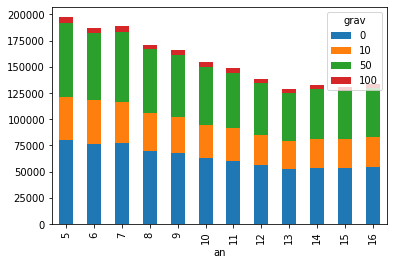

In [2]:
severity_by_year = pd.merge(data_users[['Num_Acc', 'grav']],
                            data_caracteristics[['Num_Acc', 'an']],
                            how="left",
                            on=['Num_Acc', 'Num_Acc'])

#print(severity_by_year.head())

res = severity_by_year[['grav', 'an']].groupby(['an']).value_counts().reset_index()
#print(severity_by_year[['grav', 'an']].groupby(['an']))
print(res)
#print(res.dtype)
#print(res.shape)
print(res.columns)
#res_frame.pivot(index='an', columns='grav')
#print(res_frame)
#print(res_frame.shape)
res = res.pivot(index='an', columns='grav', values=0)
print(res)
res.plot(kind='bar', stacked=True)
plt.show()

In [1]:
import pandas as pd

print(pd.__version__)

1.4.0
